In [16]:
#Import skater data csv file

import pandas as pd

NewDF = pd.read_csv("data/skaters_SS2.csv")
NewDF


,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS,ADP,ADPM,AUC,OWN,EPOS,...,P_FOL,P_FOT,P_PIM,P_PPG,P_PPA,P_PPP,P_GWG,P_ATOI,P_PM,TFSI
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,0,0,51,14,26,40,6,19.8943,--,284.25
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,518,970,26,6,21,27,7,22.1783,NaN,278.00
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,85,149,81,10,20,30,6,19.6663,NaN,246.75
3,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,61,97,47,11,16,27,6,19.8599,NaN,244.25
4,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,40,60,39,15,16,31,7,18.3172,NaN,242.25
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,662,1176,45,9,20,29,6,21.0544,NaN,238.25
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,445,949,52,17,20,37,6,18.5314,NaN,232.50
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,40,60,28,5,19,24,6,19.7530,NaN,231.50
8,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,546,1005,90,13,21,34,5,18.9033,NaN,229.75
9,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,523,1093,20,10,11,21,7,18.3514,NaN,227.75


In [17]:
#Assign Yahoo Eligibility

PosDF = pd.DataFrame(NewDF["PLAYER"])
PosDF["YPOS"] = NewDF["YPOS"]
PosDF.head(15)

#Yes/No columns to store eligibilty for each position 
EligibleD = []
EligibleW = []
EligibleC = []

#Loop to assign eligibility by player
for PosString in PosDF["YPOS"]:
    EligRowD = "No"
    EligRowW = "No"
    EligRowC = "No"
    for poscount in PosString:
        if poscount == "D": EligRowD = "Yes"
        if poscount[-1:] == "W": EligRowW = "Yes"
        if poscount == "C": EligRowC = "Yes"

#Appends single player eligibility to columns
    EligibleD.append(EligRowD)
    EligibleW.append(EligRowW)
    EligibleC.append(EligRowC)

#Adds each position eligibilty to dataframe
PosDF["C_Eligible"] = EligibleC
PosDF["W_Eligible"] = EligibleW
PosDF["D_Eligible"] = EligibleD


NewPosDF = pd.merge(NewDF, PosDF, on="PLAYER", how='inner')

NewPosDF

,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS_x,ADP,ADPM,AUC,OWN,EPOS,...,P_PPA,P_PPP,P_GWG,P_ATOI,P_PM,TFSI,YPOS_y,C_Eligible,W_Eligible,D_Eligible
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,26,40,6,19.8943,--,284.25,RW,No,Yes,No
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,21,27,7,22.1783,NaN,278.00,C,Yes,No,No
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,20,30,6,19.6663,NaN,246.75,LW,No,Yes,No
3,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,16,27,6,19.8599,NaN,244.25,RW,No,Yes,No
4,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,16,31,7,18.3172,NaN,242.25,RW,No,Yes,No
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,20,29,6,21.0544,NaN,238.25,C,Yes,No,No
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,20,37,6,18.5314,NaN,232.50,C,Yes,No,No
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,19,24,6,19.7530,NaN,231.50,LW,No,Yes,No
8,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,21,34,5,18.9033,NaN,229.75,C,Yes,No,No
9,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,11,21,7,18.3514,NaN,227.75,C,Yes,No,No


In [18]:
#Adds Plus/Minus estimates based on predicted team standings.

PlusMinusDF = pd.read_csv("data/PlusMinus.csv")

NewPlusMinusDF = pd.merge(NewPosDF, PlusMinusDF, on="TEAM", how="left")
NewPlusMinusDF

,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS_x,ADP,ADPM,AUC,OWN,EPOS,...,P_PPP,P_GWG,P_ATOI,P_PM,TFSI,YPOS_y,C_Eligible,W_Eligible,D_Eligible,PlusMinus
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,40,6,19.8943,--,284.25,RW,No,Yes,No,10
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,27,7,22.1783,NaN,278.00,C,Yes,No,No,-10
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,30,6,19.6663,NaN,246.75,LW,No,Yes,No,10
3,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,27,6,19.8599,NaN,244.25,RW,No,Yes,No,5
4,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,31,7,18.3172,NaN,242.25,RW,No,Yes,No,10
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,29,6,21.0544,NaN,238.25,C,Yes,No,No,5
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,37,6,18.5314,NaN,232.50,C,Yes,No,No,10
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,24,6,19.7530,NaN,231.50,LW,No,Yes,No,5
8,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,34,5,18.9033,NaN,229.75,C,Yes,No,No,0
9,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,21,7,18.3514,NaN,227.75,C,Yes,No,No,5


In [19]:
NewPlusMinusDF.columns

Index(['LWLRANK', 'PLAYER', 'TEAM', 'NHLPOS', 'YPOS_x', 'ADP', 'ADPM', 'AUC',
       'OWN', 'EPOS', 'EADP', 'EAUC', 'EOWN', 'INJ', 'DAY1AGE', 'ONG', 'AAV',
       'CSHPCT', 'LYSHPCT', 'PDO', 'CIPP', 'LIPP', 'AEVTOI', 'APKTOI',
       'APPTOI', 'ATOI', 'SHFG', 'CGP', 'CG', 'CA', 'CPTS', 'CSOG', '3YGP',
       '3YG', '3YA', '3YPTS', '3YH', '3YBS', '3YFOW', '3YSHG', '3YSHA', 'P_G',
       'P_A', 'P_PTS', 'P_SOG', 'P_H', 'P_BS', 'P_FOW', 'P_FOL', 'P_FOT',
       'P_PIM', 'P_PPG', 'P_PPA', 'P_PPP', 'P_GWG', 'P_ATOI', 'P_PM', 'TFSI',
       'YPOS_y', 'C_Eligible', 'W_Eligible', 'D_Eligible', 'PlusMinus'],
      dtype='object')

In [43]:
PlayerValDF = NewPlusMinusDF
PlayerValDF["TotPts"] = 2*PlayerValDF["P_G"] + 2*PlayerValDF["P_A"] + 0.25*PlayerValDF["P_BS"] + 0.25*PlayerValDF["P_PIM"] \
    + PlayerValDF["P_PPP"] + PlayerValDF["P_GWG"]

PlayerValDF["PtsPlus"] = PlayerValDF["TotPts"] + PlayerValDF["PlusMinus"]

PlayerValDF = PlayerValDF.sort_values(['PtsPlus'],ascending=False)

PlayerValDF.reset_index(drop=True, inplace=True)

PlayerValDF

,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS_x,ADP,ADPM,AUC,OWN,EPOS,...,P_ATOI,P_PM,TFSI,YPOS_y,C_Eligible,W_Eligible,D_Eligible,PlusMinus,TotPts,PtsPlus
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,19.8943,--,284.25,RW,No,Yes,No,10,284.25,294.25
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,22.1783,NaN,278.00,C,Yes,No,No,-10,278.00,268.00
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,19.6663,NaN,246.75,LW,No,Yes,No,10,246.75,256.75
3,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,18.3172,NaN,242.25,RW,No,Yes,No,10,242.25,252.25
4,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,19.8599,NaN,244.25,RW,No,Yes,No,5,244.25,249.25
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,21.0544,NaN,238.25,C,Yes,No,No,5,238.25,243.25
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,18.5314,NaN,232.50,C,Yes,No,No,10,232.50,242.50
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,19.7530,NaN,231.50,LW,No,Yes,No,5,231.50,236.50
8,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,18.3514,NaN,227.75,C,Yes,No,No,5,227.75,232.75
9,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,18.9033,NaN,229.75,C,Yes,No,No,0,229.75,229.75


In [44]:
#Calculate marginal values for each skater at each position

#There should be 96 skaters (8x12)
CountC = 35
CountW= 37
CountD = 24

MarginalValueC = PlayerValDF.loc[PlayerValDF['C_Eligible']=="Yes"].iloc[CountC-1]["PtsPlus"]
#MarginalValueC = MargCDF["PtsPlus"]

MarginalValueW = PlayerValDF.loc[PlayerValDF['W_Eligible']=="Yes"].iloc[CountW-1]["PtsPlus"]
#MarginalValueW = MargWDF["PtsPlus"]

MarginalValueD = PlayerValDF.loc[PlayerValDF['D_Eligible']=="Yes"].iloc[CountD-1]["PtsPlus"]
#MarginalValueD = MargDDF["PtsPlus"]

print([MarginalValueC, MarginalValueW, MarginalValueD])

MarginalPts = []
MP = -999
for i in range(PlayerValDF["PLAYER"].shape[0]):
#for i in range(24):
    if PlayerValDF["C_Eligible"][i]=="Yes": MP = PlayerValDF["PtsPlus"][i] - MarginalValueC
    if PlayerValDF["W_Eligible"][i]=="Yes": MP = PlayerValDF["PtsPlus"][i] - MarginalValueW
    if PlayerValDF["D_Eligible"][i]=="Yes": MP = PlayerValDF["PtsPlus"][i] - MarginalValueD
    #print(MP)
    MarginalPts.append(MP)
    MP = -999

MarginalPts
PlayerValDF["MarginalPts"] = MarginalPts



PlayerValDF

[164.75, 164.25, 152.75]


,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS_x,ADP,ADPM,AUC,OWN,EPOS,...,P_PM,TFSI,YPOS_y,C_Eligible,W_Eligible,D_Eligible,PlusMinus,TotPts,PtsPlus,MarginalPts
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,--,284.25,RW,No,Yes,No,10,284.25,294.25,130.00
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,NaN,278.00,C,Yes,No,No,-10,278.00,268.00,103.25
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,NaN,246.75,LW,No,Yes,No,10,246.75,256.75,92.50
3,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,NaN,242.25,RW,No,Yes,No,10,242.25,252.25,88.00
4,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,NaN,244.25,RW,No,Yes,No,5,244.25,249.25,85.00
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,NaN,238.25,C,Yes,No,No,5,238.25,243.25,78.50
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,NaN,232.50,C,Yes,No,No,10,232.50,242.50,77.75
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,NaN,231.50,LW,No,Yes,No,5,231.50,236.50,72.25
8,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,NaN,227.75,C,Yes,No,No,5,227.75,232.75,68.00
9,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,NaN,229.75,C,Yes,No,No,0,229.75,229.75,65.00


In [22]:
#import pandas as pd

NewGDF = pd.read_csv("data/goalies_SS2.csv")

NewGDF


    

,LWLRANK,PLAYER,TEAM,ADP,ADPM,AUC,OWN,EADP,EAUC,EOWN,...,P_W,P_L,P_OTL,P_SA,P_SV,P_GA,P_GAA,P_SVPCT,P_SHO,TFSI
0,1,Frederik Andersen,TOR,36.8,+,25.7,100,127.6,2.7,88,...,35,22,9,2197,2015,182,2.75,0.917,4,178.8
1,2,Sergei Bobrovsky,FLA,19.4,NaN,39.4,100,48.2,13.4,99,...,35,20,9,2058,1891,167,2.61,0.919,4,177.8
2,3,Andrei Vasilevskiy,TBL,9.2,NaN,52.4,100,26.2,18.0,99,...,33,21,8,1986,1823,163,2.62,0.918,4,166.8
3,4,John Gibson,ANA,53.0,NaN,14.9,100,134.7,4.3,80,...,26,28,8,2021,1853,168,2.71,0.917,4,157.2
4,5,Devan Dubnyk,MIN,78.1,NaN,4.5,100,121.8,5.3,82,...,32,23,9,1933,1771,162,2.53,0.916,4,154.8
5,6,Carey Price,MTL,41.2,+,17.5,100,48.7,12.2,97,...,27,25,8,1875,1721,154,2.56,0.918,4,153.2
6,7,Connor Hellebuyck,WPG,71.5,+,3.1,100,179.2,0.5,72,...,29,25,9,2048,1872,176,2.79,0.914,3,148.0
7,8,Philipp Grubauer,COL,75.5,NaN,7.4,100,182.8,1.0,66,...,26,19,7,1683,1548,135,2.59,0.920,3,146.0
8,9,Matt Murray,PIT,65.3,+,5.4,100,189.1,0.7,69,...,29,20,8,1849,1694,155,2.71,0.916,3,145.5
9,10,Antti Raanta,ARI,108.0,NaN,4.4,100,161.0,1.4,69,...,24,19,7,1592,1466,126,2.52,0.921,3,141.5


In [23]:
GoalieValDF = NewGDF

MarginalG = GoalieValDF.iloc[23]["TFSI"]
MarginalG

MarginalPts = []

for TFSI in GoalieValDF["TFSI"]:
    MP = TFSI - MarginalG
    MarginalPts.append(MP)

GoalieValDF["MarginalPts"] = MarginalPts
GoalieValDF

,LWLRANK,PLAYER,TEAM,ADP,ADPM,AUC,OWN,EADP,EAUC,EOWN,...,P_L,P_OTL,P_SA,P_SV,P_GA,P_GAA,P_SVPCT,P_SHO,TFSI,MarginalPts
0,1,Frederik Andersen,TOR,36.8,+,25.7,100,127.6,2.7,88,...,22,9,2197,2015,182,2.75,0.917,4,178.8,74.6
1,2,Sergei Bobrovsky,FLA,19.4,NaN,39.4,100,48.2,13.4,99,...,20,9,2058,1891,167,2.61,0.919,4,177.8,73.6
2,3,Andrei Vasilevskiy,TBL,9.2,NaN,52.4,100,26.2,18.0,99,...,21,8,1986,1823,163,2.62,0.918,4,166.8,62.6
3,4,John Gibson,ANA,53.0,NaN,14.9,100,134.7,4.3,80,...,28,8,2021,1853,168,2.71,0.917,4,157.2,53.0
4,5,Devan Dubnyk,MIN,78.1,NaN,4.5,100,121.8,5.3,82,...,23,9,1933,1771,162,2.53,0.916,4,154.8,50.6
5,6,Carey Price,MTL,41.2,+,17.5,100,48.7,12.2,97,...,25,8,1875,1721,154,2.56,0.918,4,153.2,49.0
6,7,Connor Hellebuyck,WPG,71.5,+,3.1,100,179.2,0.5,72,...,25,9,2048,1872,176,2.79,0.914,3,148.0,43.8
7,8,Philipp Grubauer,COL,75.5,NaN,7.4,100,182.8,1.0,66,...,19,7,1683,1548,135,2.59,0.920,3,146.0,41.8
8,9,Matt Murray,PIT,65.3,+,5.4,100,189.1,0.7,69,...,20,8,1849,1694,155,2.71,0.916,3,145.5,41.3
9,10,Antti Raanta,ARI,108.0,NaN,4.4,100,161.0,1.4,69,...,19,7,1592,1466,126,2.52,0.921,3,141.5,37.3


In [24]:
AddName = []

GoalieValDF.reset_index(drop=True, inplace=True)

for i in range(GoalieValDF.shape[0]):
    temp = GoalieValDF["PLAYER"][i].split()[1] + "-" + GoalieValDF["TEAM"][i]
    AddName.append(temp)

GoalieValDF["Nickname"] = AddName

GoalieValDF["AvgDraft"] = GoalieValDF["ADP"] / 12 + 1
GoalieValDF

,LWLRANK,PLAYER,TEAM,ADP,ADPM,AUC,OWN,EADP,EAUC,EOWN,...,P_SA,P_SV,P_GA,P_GAA,P_SVPCT,P_SHO,TFSI,MarginalPts,Nickname,AvgDraft
0,1,Frederik Andersen,TOR,36.8,+,25.7,100,127.6,2.7,88,...,2197,2015,182,2.75,0.917,4,178.8,74.6,Andersen-TOR,4.066667
1,2,Sergei Bobrovsky,FLA,19.4,NaN,39.4,100,48.2,13.4,99,...,2058,1891,167,2.61,0.919,4,177.8,73.6,Bobrovsky-FLA,2.616667
2,3,Andrei Vasilevskiy,TBL,9.2,NaN,52.4,100,26.2,18.0,99,...,1986,1823,163,2.62,0.918,4,166.8,62.6,Vasilevskiy-TBL,1.766667
3,4,John Gibson,ANA,53.0,NaN,14.9,100,134.7,4.3,80,...,2021,1853,168,2.71,0.917,4,157.2,53.0,Gibson-ANA,5.416667
4,5,Devan Dubnyk,MIN,78.1,NaN,4.5,100,121.8,5.3,82,...,1933,1771,162,2.53,0.916,4,154.8,50.6,Dubnyk-MIN,7.508333
5,6,Carey Price,MTL,41.2,+,17.5,100,48.7,12.2,97,...,1875,1721,154,2.56,0.918,4,153.2,49.0,Price-MTL,4.433333
6,7,Connor Hellebuyck,WPG,71.5,+,3.1,100,179.2,0.5,72,...,2048,1872,176,2.79,0.914,3,148.0,43.8,Hellebuyck-WPG,6.958333
7,8,Philipp Grubauer,COL,75.5,NaN,7.4,100,182.8,1.0,66,...,1683,1548,135,2.59,0.920,3,146.0,41.8,Grubauer-COL,7.291667
8,9,Matt Murray,PIT,65.3,+,5.4,100,189.1,0.7,69,...,1849,1694,155,2.71,0.916,3,145.5,41.3,Murray-PIT,6.441667
9,10,Antti Raanta,ARI,108.0,NaN,4.4,100,161.0,1.4,69,...,1592,1466,126,2.52,0.921,3,141.5,37.3,Raanta-ARI,10.000000


In [45]:
AddName = []

PlayerValDF.reset_index(drop=True, inplace=True)

for i in range(PlayerValDF.shape[0]):
    temp = PlayerValDF["PLAYER"][i].split()[1] + "-" + PlayerValDF["TEAM"][i]
    AddName.append(temp)

PlayerValDF["Nickname"] = AddName

PlayerValDF


,LWLRANK,PLAYER,TEAM,NHLPOS,YPOS_x,ADP,ADPM,AUC,OWN,EPOS,...,TFSI,YPOS_y,C_Eligible,W_Eligible,D_Eligible,PlusMinus,TotPts,PtsPlus,MarginalPts,Nickname
0,1,Nikita Kucherov,TBL,R,RW,2.0,NaN,62.1,100,RW,...,284.25,RW,No,Yes,No,10,284.25,294.25,130.00,Kucherov-TBL
1,2,Connor McDavid,EDM,C,C,1.5,NaN,61.8,100,C,...,278.00,C,Yes,No,No,-10,278.00,268.00,103.25,McDavid-EDM
2,3,Brad Marchand,BOS,L,LW,8.4,NaN,55.8,100,LW,...,246.75,LW,No,Yes,No,10,246.75,256.75,92.50,Marchand-BOS
3,5,David Pastrnak,BOS,R,RW,12.4,NaN,51.6,100,"RW,LW",...,242.25,RW,No,Yes,No,10,242.25,252.25,88.00,Pastrnak-BOS
4,4,Mikko Rantanen,COL,R,RW,20.2,NaN,43.4,100,RW,...,244.25,RW,No,Yes,No,5,244.25,249.25,85.00,Rantanen-COL
5,6,Nathan MacKinnon,COL,C,C,3.5,NaN,60.0,100,C,...,238.25,C,Yes,No,No,5,238.25,243.25,78.50,MacKinnon-COL
6,7,Steven Stamkos,TBL,C,C,15.0,NaN,42.7,100,C,...,232.50,C,Yes,No,No,10,232.50,242.50,77.75,Stamkos-TBL
7,8,Johnny Gaudreau,CGY,L,LW,19.1,NaN,42.9,100,LW,...,231.50,LW,No,Yes,No,5,231.50,236.50,72.25,Gaudreau-CGY
8,10,Auston Matthews,TOR,C,C,9.7,NaN,53.9,100,C,...,227.75,C,Yes,No,No,5,227.75,232.75,68.00,Matthews-TOR
9,9,Evgeni Malkin,PIT,C,C,33.1,NaN,33.1,100,C,...,229.75,C,Yes,No,No,0,229.75,229.75,65.00,Malkin-PIT


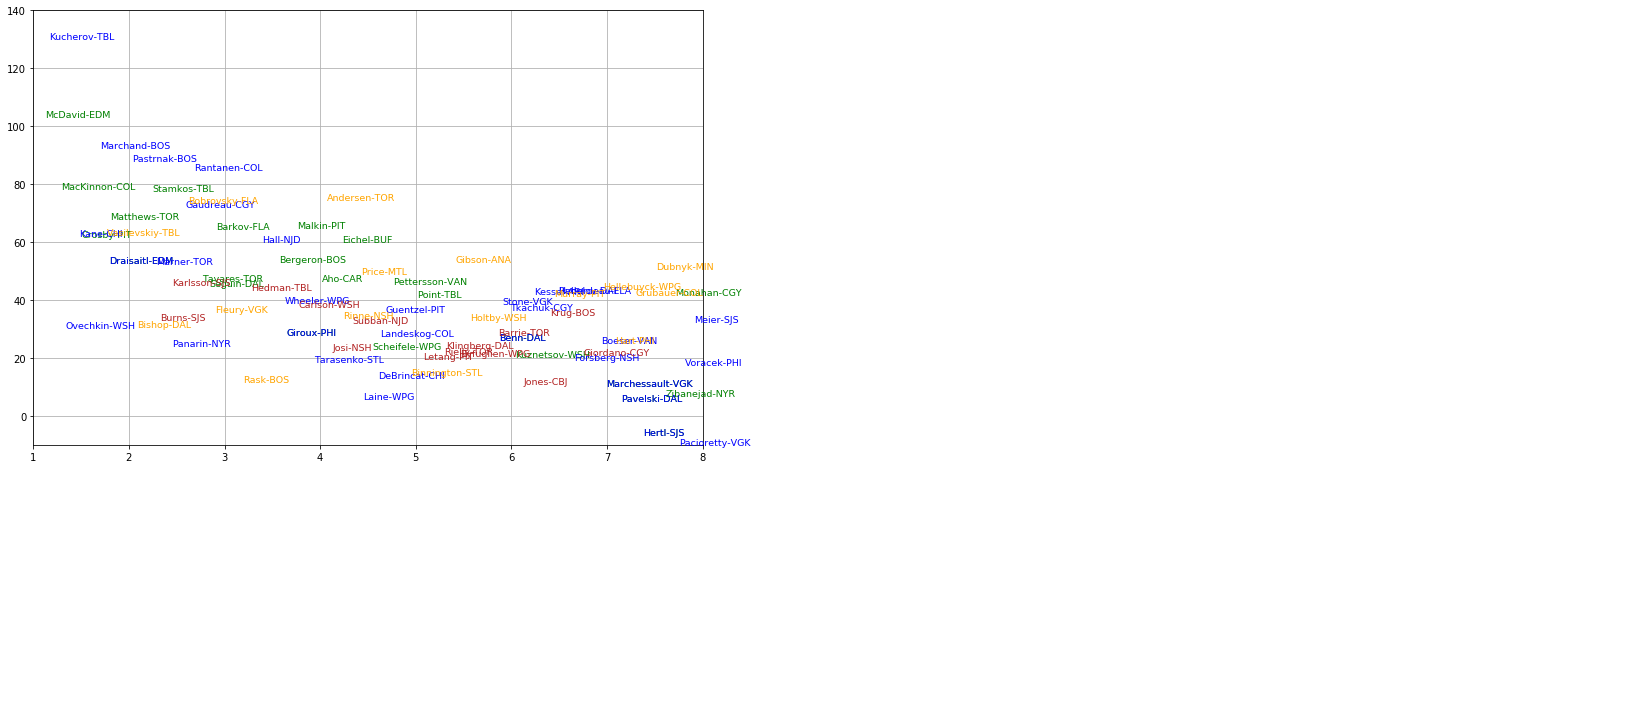

In [53]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

plt.figure(figsize=(12,8))

PlayerValDF["AvgDraft"] = PlayerValDF["ADP"] / 12 + 1

x_axis = np.arange(0,5)

PlotC = PlayerValDF.loc[(PlayerValDF["C_Eligible"]=="Yes") & (PlayerValDF["ADP"]>0)]
PlotW = PlayerValDF.loc[(PlayerValDF["W_Eligible"]=="Yes") & (PlayerValDF["ADP"]>0)]
PlotD = PlayerValDF.loc[(PlayerValDF["D_Eligible"]=="Yes") & (PlayerValDF["ADP"]>0)]
PlotG = GoalieValDF.loc[GoalieValDF["ADP"]>0]

Centers = plt.scatter(PlotC["AvgDraft"], PlotC["MarginalPts"], facecolors = "green", s = 0)

i=0

for x,y in zip(PlotC["AvgDraft"],PlotC["MarginalPts"]):
    
    label = PlotC.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "green",
                 fontsize = 9.5,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center


    
Wings = plt.scatter(PlotW["AvgDraft"], PlotW["MarginalPts"], facecolors = "blue", s = 0)

i=0

for x,y in zip(PlotW["AvgDraft"],PlotW["MarginalPts"]):
    
    label = PlotW.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "blue",
                 fontsize = 9.5,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center

    
Defense = plt.scatter(PlotD["AvgDraft"], PlotD["MarginalPts"], facecolors = "firebrick", s = 0)

i=0

for x,y in zip(PlotD["AvgDraft"],PlotD["MarginalPts"]):
    
    label = PlotD.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "firebrick",
                 fontsize = 9.5,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center

Goalie = plt.scatter(PlotG["AvgDraft"], PlotG["MarginalPts"], facecolors = "orange", s = 0)

i=0

for x,y in zip(PlotG["AvgDraft"],PlotG["MarginalPts"]):
    
    label = PlotG.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "orange",
                 fontsize = 9.5,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center


plt.grid()
plt.xlim([1,8])
plt.ylim([-10,140])

plt.savefig("Guapos Grid")

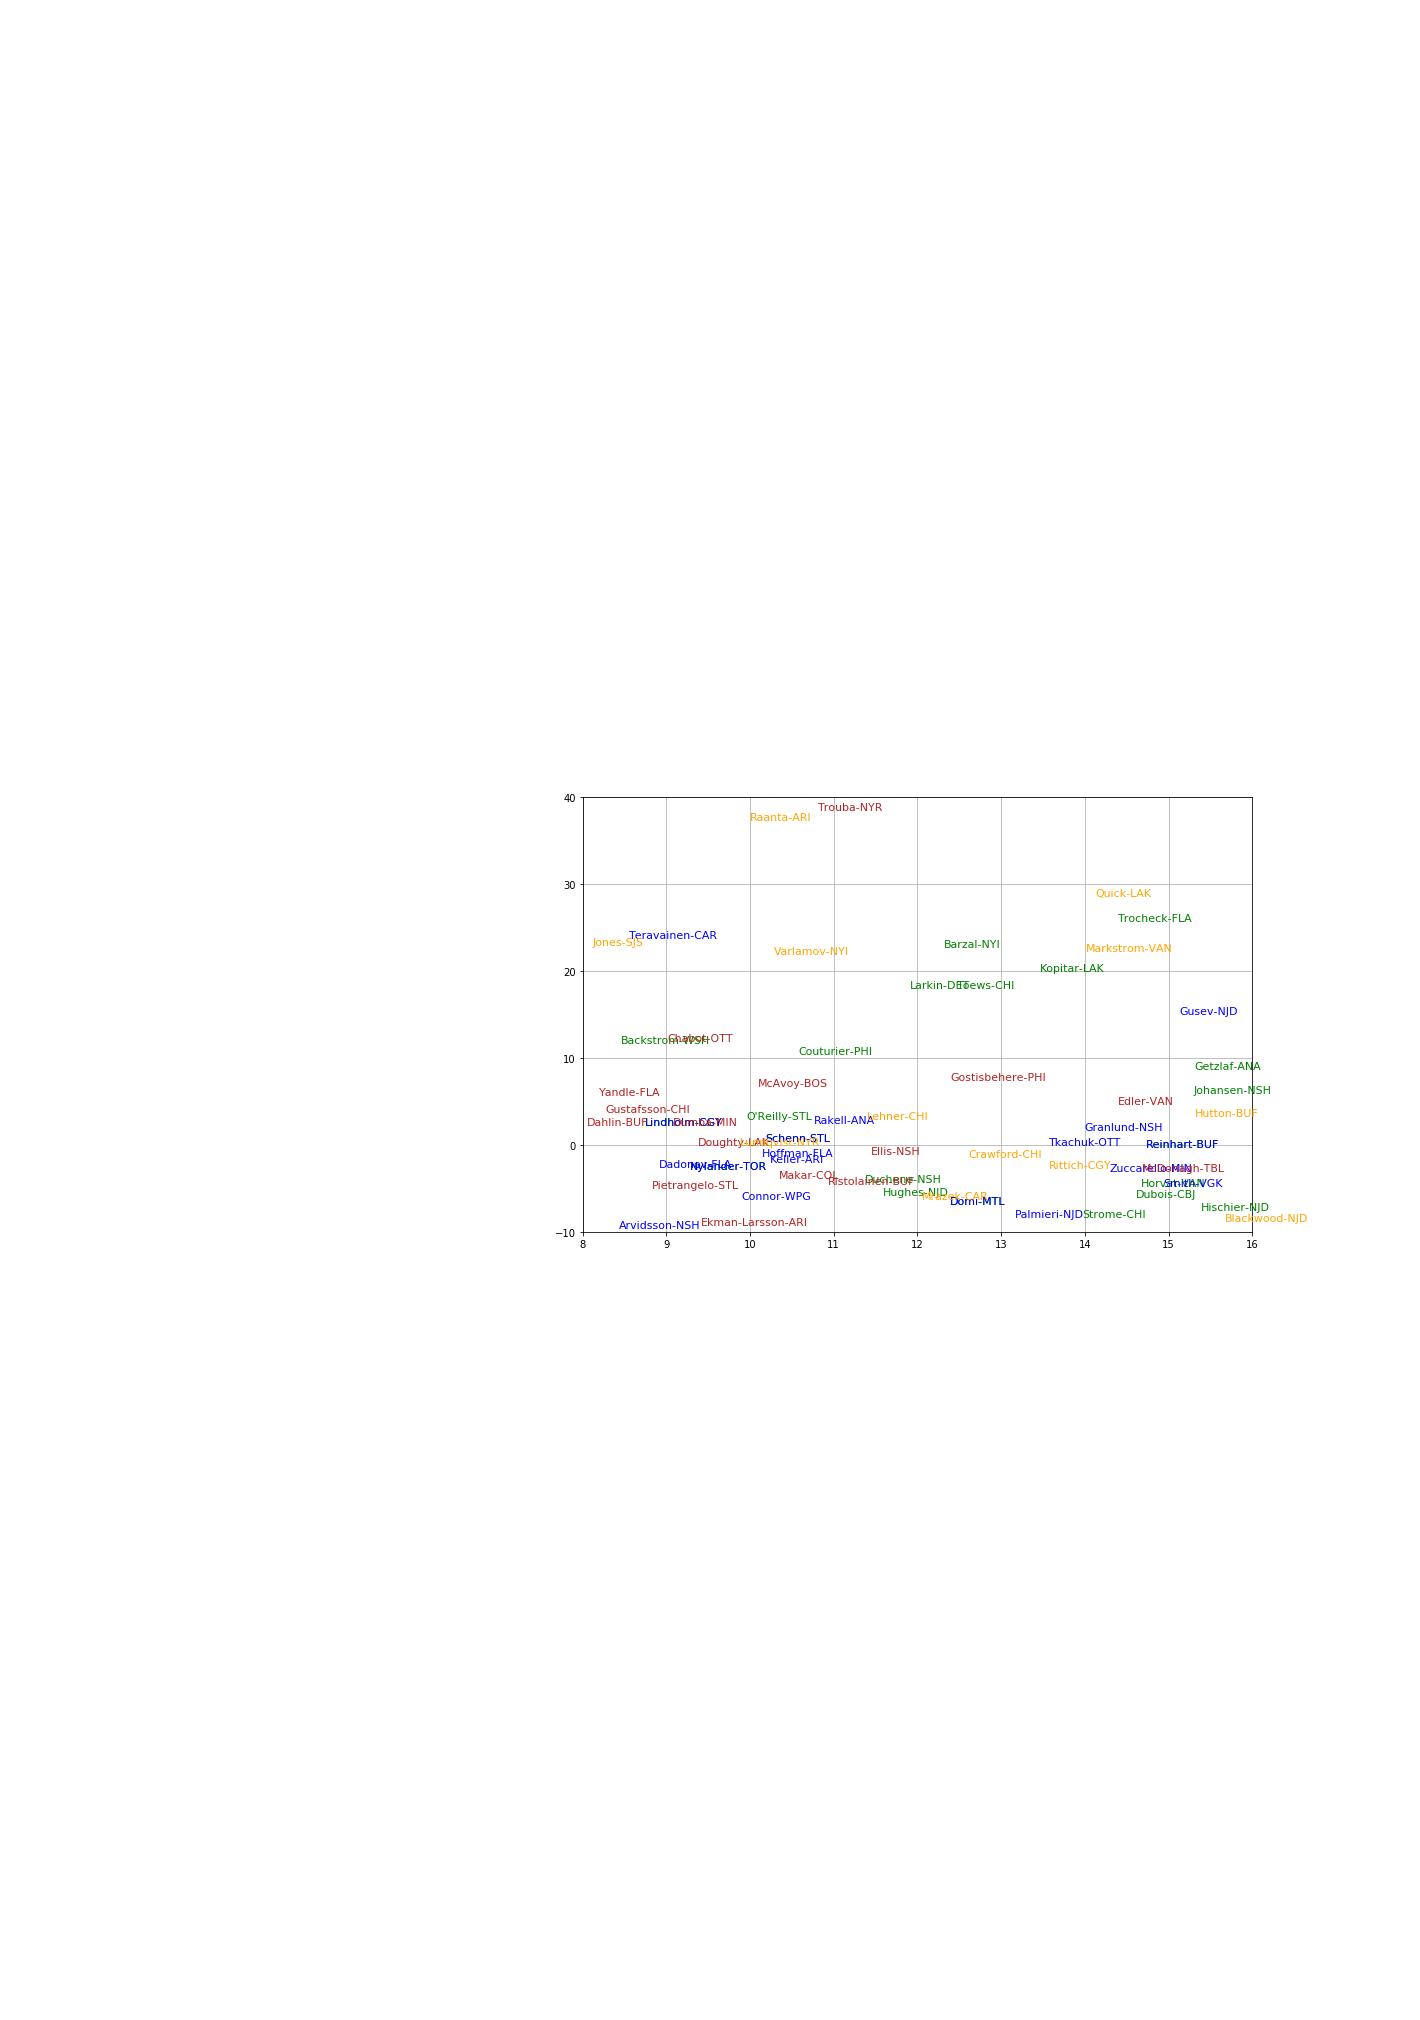

In [60]:
#Second chart for Rounds 8+


plt.figure(figsize=(12,8))

Centers = plt.scatter(PlotC["AvgDraft"], PlotC["MarginalPts"], facecolors = "green", s = 0)

i=0

for x,y in zip(PlotC["AvgDraft"],PlotC["MarginalPts"]):
    
    label = PlotC.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "green",
                 fontsize = 11,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center

    
Wings = plt.scatter(PlotW["AvgDraft"], PlotW["MarginalPts"], facecolors = "blue", s = 0)

i=0

for x,y in zip(PlotW["AvgDraft"],PlotW["MarginalPts"]):
    
    label = PlotW.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "blue",
                 fontsize = 11,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center

    
Defense = plt.scatter(PlotD["AvgDraft"], PlotD["MarginalPts"], facecolors = "firebrick", s = 0)

i=0

for x,y in zip(PlotD["AvgDraft"],PlotD["MarginalPts"]):
    
    label = PlotD.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "firebrick",
                 fontsize = 11,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center

Goalie = plt.scatter(PlotG["AvgDraft"], PlotG["MarginalPts"], facecolors = "orange", s = 0)

i=0

for x,y in zip(PlotG["AvgDraft"],PlotG["MarginalPts"]):
    
    label = PlotG.iloc[i]["Nickname"]
    i=i+1
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 #xytext=(25*j/abs(j),0), # distance from text to points (x,y)
                 xytext=(0,0),
                 color = "orange",
                 fontsize = 11,
                 weight = 'normal',
                 ha='left') # horizontal alignment can be left, right or center


plt.grid()
plt.xlim([8,16])
plt.ylim([-10,40])

plt.savefig("Guapos Grid2")